# Task - 2 : A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report , f1_score , confusion_matrix , accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('data/Companydata.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
label = LabelEncoder()

In [7]:
# Label Encoding
df['Urban'] = label.fit_transform(df['Urban'])
df['US'] = label.fit_transform(df['US'])
df = pd.get_dummies(df , columns= ['ShelveLoc'] , drop_first= True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0


In [8]:
df['Sales'].mean()

7.496325

In [9]:
# Converting sales to categorical variable
df['Sales'] = pd.cut(df["Sales"], bins = [df['Sales'].min() , df['Sales'].mean() , df['Sales'].max()], labels = ["Bad", "Good"])

In [10]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,Good,138,73,11,276,120,42,17,1,1,0,0
1,Good,111,48,16,260,83,65,10,1,1,1,0
2,Good,113,35,10,269,80,59,12,1,1,0,1
3,Bad,117,100,4,466,97,55,14,1,1,0,1
4,Bad,141,64,3,340,128,38,13,1,0,0,0


In [11]:
df['Sales'] = label.fit_transform(df['Sales'])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,1,0
2,1,113,35,10,269,80,59,12,1,1,0,1
3,0,117,100,4,466,97,55,14,1,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0


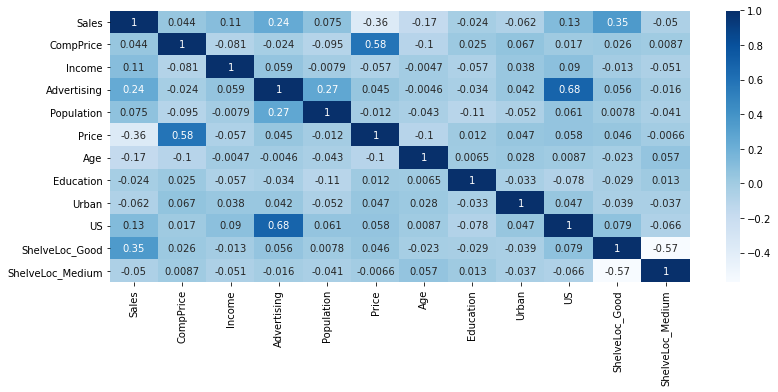

In [12]:
plt.figure(figsize = (13,5))
sns.heatmap(df.corr() , cmap = 'Blues' , annot = True)

In [13]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
390,0.316327,0.545455,0.310345,0.102204,0.520958,0.763636,0.250,1.0,1.0,0.0,1.0
391,0.775510,0.424242,0.000000,0.078156,0.598802,0.563636,0.750,1.0,0.0,0.0,0.0
392,0.530612,0.212121,0.448276,0.611222,0.634731,0.163636,0.375,1.0,1.0,0.0,0.0
393,0.326531,0.303030,0.344828,0.032064,0.574850,0.090909,0.875,0.0,1.0,0.0,1.0
394,0.540816,0.373737,0.655172,0.713427,0.688623,0.145455,0.750,1.0,1.0,0.0,0.0
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.145455,0.500,1.0,1.0,1.0,0.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.545455,0.125,0.0,1.0,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.272727,1.000,1.0,1.0,0.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.454545,0.250,1.0,1.0,0.0,0.0
399,0.581633,0.161616,0.000000,0.034068,0.574850,0.436364,0.750,1.0,1.0,1.0,0.0


In [15]:
# Separating target column
x = df_norm.iloc[: , :]
y = df.iloc[:,0]

In [16]:
# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier()

# Instantiate grid search model
grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid)

grid_search.fit(x,y)
grid_search.best_params_

{'max_depth': 60,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 300}

In [21]:
kfold = KFold(n_splits=10, random_state=7 , shuffle = True)
model = RandomForestClassifier(max_depth= 60 , min_samples_leaf= 4 , min_samples_split= 8 , n_estimators = 300)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8125


In [22]:
model.fit(x,y)

RandomForestClassifier(max_depth=60, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=300)

## Plotting 1st estimator (decision tree) out of total = 300 trees

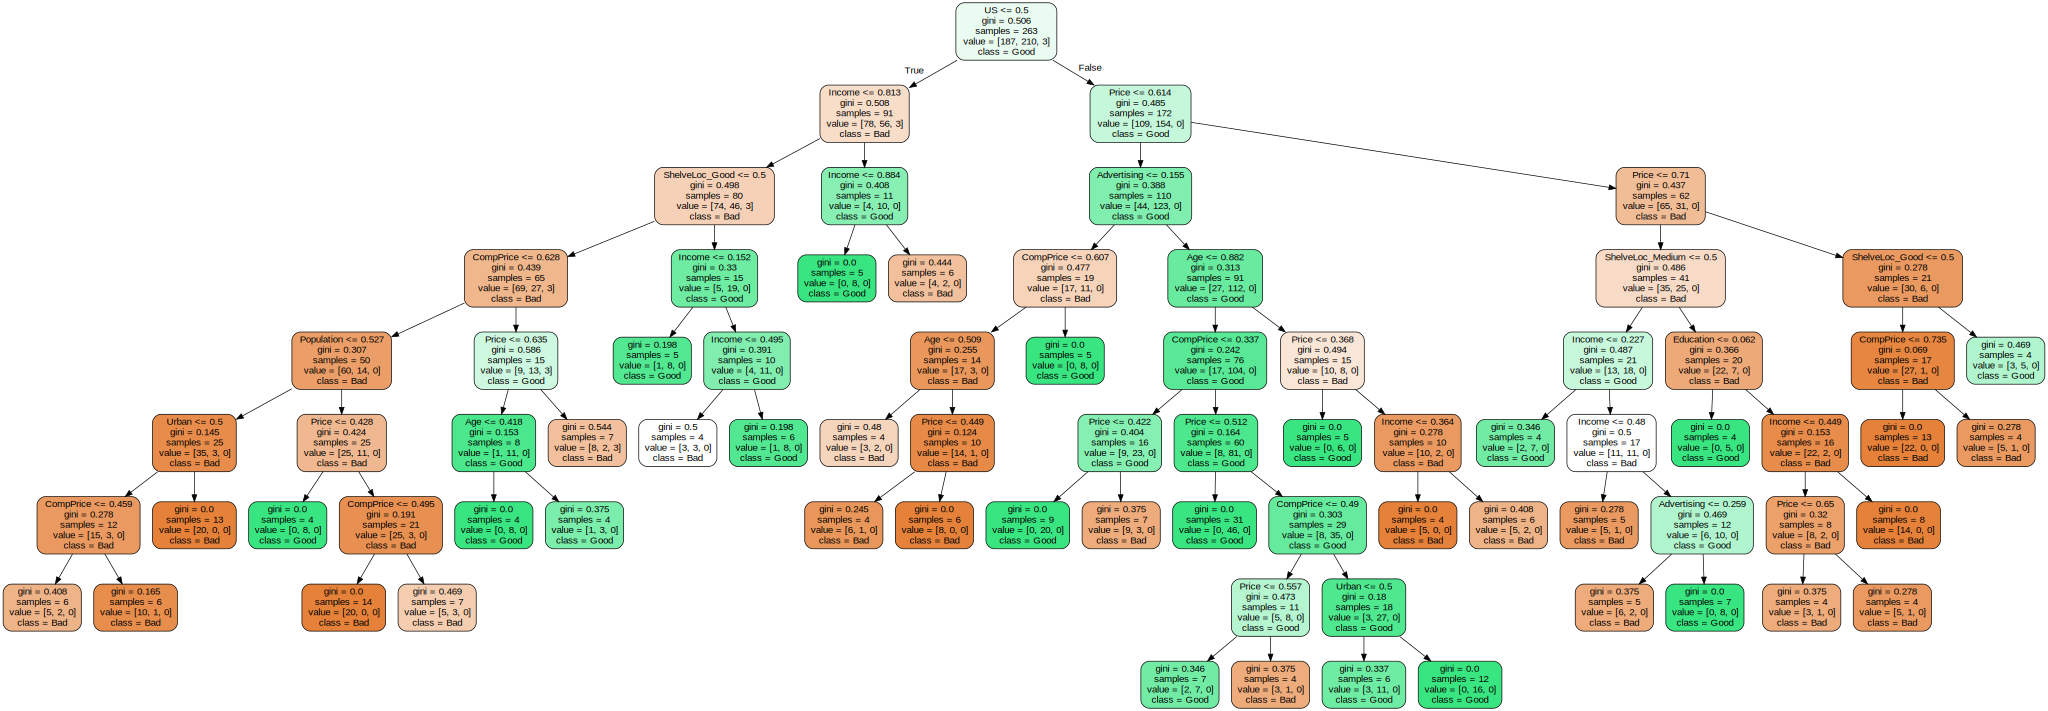

In [23]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model.estimators_[4], feature_names = df_norm.columns ,class_names = ['Bad','Good'], \
                           filled=True, impurity=True, rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

### It is concluded that the Random forest with {'max_depth': 60, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 300} was best fit. <br> Mean Cross validation score = 0.8125 for this random forest model